In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')

    if not auto_scaled:
        plt.axis('square')

    plt.grid(True)
    plt.title(title)

    plt.show()


def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [3]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [4]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Формула Standard Scaling (or Z-score normalization):

$$ \large z= \frac{x-\mu}{\sigma} $$

In [5]:
# 1 point
def z_score_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X)
    zscore = (X - mean) / std
    return zscore

In [6]:
z_score_scale(wine_data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [7]:
assert np.allclose(np.array(z_score_scale(wine_data)), StandardScaler().fit_transform(wine_data))

### Pipeline Version (2 points)

In [8]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):
    X = None
    y = None

    def __init__(self, copy=True, with_mean=True, with_std=True):
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X, y=None):
        self.X, self.y = self.__apply_copy(self.copy, X, y)
        return self

    def transform(self, X, copy=None):
        __copy = self.__get_copy_param(self.copy, copy)
        __x, _ = self.__apply_copy(__copy, X, None)

        mean = self.get_mean(__x)
        std = self.get_std(__x)
        zscore = (__x - mean) / std

        return zscore

    def get_mean(self, x):
        if self.with_mean:
            return np.mean(x, axis=0)
        else:
            return 0

    def get_std(self, x):
        if self.with_std:
            return np.std(x)
        else:
            return 1

    def __apply_copy(self, copy_param: bool, X, y=None):

        if copy_param:
            __x = X.copy()
        else:
            __x = X.iloc[:]

        if y is None:
            __y = None
        elif copy_param:
            __y = y.copy()
        else:
            __y = y.iloc[:]

        return __x, __y

    def __get_copy_param(self, self_copy: bool, user_copy=None):
        if user_copy is None:
            return self_copy
        else:
            return user_copy

In [9]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

Теперь Z-score нормализацию (CustomScaler) можно использовать в Pipeline

In [10]:
pipeline_ = make_pipeline(CustomScaler(with_mean=False), LogisticRegression(max_iter=1000), verbose=True)

X, y = make_classification(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

pipeline_.fit(X_train, y_train)
pipeline_.score(X_test, y_test)

[Pipeline] ...... (step 1 of 2) Processing customscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.0s


0.92

In [11]:
from sklearn import set_config

set_config(display="diagram")
pipeline_

Pipeline(steps=[('customscaler', CustomScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(max_iter=1000))],
         verbose=True)

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [12]:
feature_0 = np.random.randn(1000) * 10
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data

array([[ -3.59334721,   1.56638173],
       [  9.61897521,  -0.71989779],
       [-25.27031882,   1.01276136],
       ...,
       [ -6.07458697,   5.8040533 ],
       [ -2.90366095,   4.54640876],
       [ -1.8188397 ,   4.86854372]])

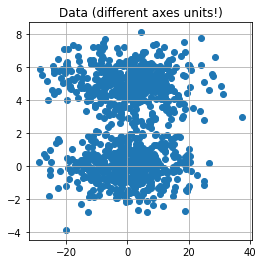

In [13]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

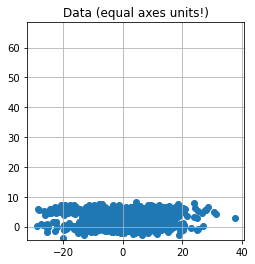

In [14]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False, title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

MinMax Scaling,переводит все точки в заданный интервал (обычно в (0, 1)).
Формула
$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

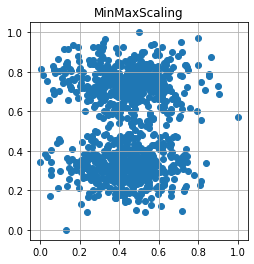

In [15]:
minMax_data = MinMaxScaler().fit_transform(data)
plot_scatter(minMax_data[:, 0], minMax_data[:, 1], auto_scaled=False, title='MinMaxScaling')

Данные распределены в диапазоне от 0 до 1 как по x, так и по y

### StandardScaler (0.5 point)

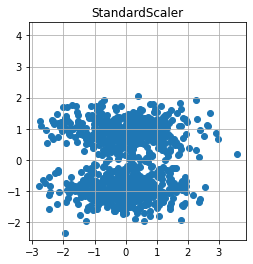

In [16]:
std_data = StandardScaler().fit_transform(data)
plot_scatter(std_data[:, 0], std_data[:, 1], auto_scaled=False, title='StandardScaler')

Ещё раз формула Standard Scaling (or Z-score normalization):

$$ \large z= \frac{x-\mu}{\sigma} $$

In [17]:
pd.DataFrame(std_data).describe()

,0,1
count,1.000000e+03,1.000000e+03
mean,-1.273981e-17,-3.070877e-16
std,1.000500e+00,1.000500e+00
min,-2.793417e+00,-2.355436e+00
25%,-6.354275e-01,-9.128121e-01
50%,3.824872e-02,2.155207e-02
75%,6.522225e-01,9.039203e-01
max,3.567727e+00,2.058059e+00


StandardScaler преобразовал данные таким образом, что их среднее значение будет ~0, а стандартное отклонение будет ~1
При этом x принял значения от -3 до 3.1, а y от -1 до 1.9

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


In [18]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
k_unscale = kmean.fit_transform(data)
k_scale = kmean.fit_transform(std_data)

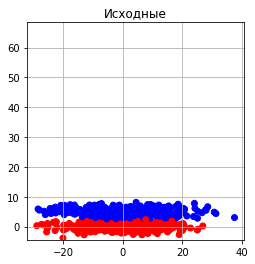

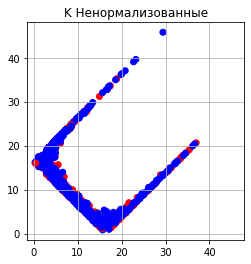

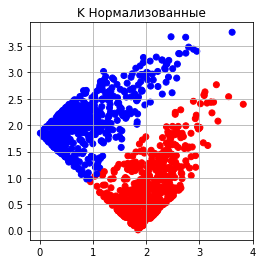

In [19]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False, title='Исходные', clusters=kmean.labels_)
plot_scatter(k_unscale[:, 0], k_unscale[:, 1], auto_scaled=False, title='K Ненормализованные', clusters=kmean.labels_)
plot_scatter(k_scale[:, 0], k_scale[:, 1], auto_scaled=True, title='K Нормализованные', clusters=kmean.labels_)

На втором графике можно заметить, что кластеризация K-mean очень плохо работает на ненормализованных данных.

## Exercise  3 - Preprocessing Pipeline (2 points)

In [20]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels,
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [21]:
pipeBasic = Pipeline([
    ('logreg', LogisticRegression(solver='liblinear', penalty='l1'))])

kfold = KFold(n_splits=5, random_state=77, shuffle=True)

print('Accuracy:')

print(cross_val_score(
    estimator=pipeBasic, X=wine_train, y=wine_labels_train, scoring="accuracy", cv=kfold
).mean(), 'Сырые данные.', )

pipeNorm = Pipeline([
    ('standardScaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', penalty='l1'))])

print(cross_val_score(
    estimator=pipeNorm, X=wine_train, y=wine_labels_train, scoring="accuracy", cv=kfold
).mean(), 'Применён StandardScaler.', )

print(cross_val_score(
    estimator=pipeNorm, X=VarianceThreshold(0.7).fit_transform(wine_train), y=wine_labels_train, scoring="accuracy",
    cv=kfold
).mean(), 'Применён StandardScaler и Feature Selection.', )

Accuracy:
0.9113333333333333 Сырые данные.
0.9756666666666666 Применён StandardScaler.
0.9513333333333334 Применён StandardScaler и Feature Selection.


Была создана модель LogisticRegression. При её тренировки использована cross validation с количеством folds равное 5.
- В первом случае модель тренировалась на сырых данных. При этом доля прогноза правильных ответов составила 91%.
- Во втором случае модель тренировалась на нормализированных данных. При этом доля прогноза правильных ответов улучшилась на 7 процентов и составила 98%.
- В третьем случае модель тренировалась на нормализированных данных с применением Feature Selection, использовался VarianceThreshold с порогом 0.7. При этом доля прогноза правильных ответов ухудшилась и составила 95%, вместо 97%.

Feature Selection применяется по двум причинам:
- Чтобы хоть как-то сгладить требования к вычислительным мощностям оборудования, если входных данных огромное количество.
- Чтобы избавиться от переобучения модели(overfit), так как в данных может содержаться неинформативные признаки или признаки, которые имеют много "шума"

Значение метрики Accuracy показывает отношение правильных прогнозов ко всему количеству прогнозов, но она не показывает конкретики где мы ошибались. В некоторых ситуациях это очень важно. Для выяснения конкретных фактов по ошибочным прогнозам необходимо применять другой подход, как например Confusion Matrix, после которого нередко случается так, что предпочтительнее применение модели с Accuracy 95%, чем модели с Accuracy 98%

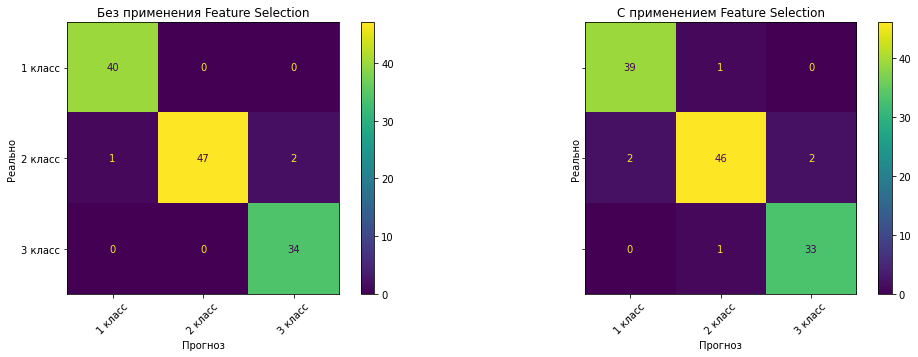

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

f, axes = plt.subplots(1, 2, figsize=(17, 5), sharey='row')


def confusion_matrix_display(confusion_matrix_results, labels, title, ax):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_results, display_labels=labels)
    disp.plot(ax=ax, xticks_rotation=45)
    disp.ax_.grid(visible=False)
    disp.ax_.set_xlabel('Прогноз')
    disp.ax_.set_ylabel('Реально')
    disp.ax_.set_title(title)


display_labels = ['1 класс', '2 класс', '3 класс']

y_pred = cross_val_predict(pipeNorm, X=wine_train, y=wine_labels_train, cv=kfold)
conf_mat = confusion_matrix(wine_labels_train, y_pred)
confusion_matrix_display(conf_mat, display_labels, 'Без применения Feature Selection', axes[0])

y_pred = cross_val_predict(pipeNorm, X=VarianceThreshold(0.7).fit_transform(wine_train), y=wine_labels_train, cv=kfold)
conf_mat = confusion_matrix(wine_labels_train, y_pred)
confusion_matrix_display(conf_mat, display_labels, 'С применением Feature Selection', axes[1])

plt.show()


Для характеристик вина можно наблюдать, что при применении подхода Feature Selection(VarianceThreshold) модель ошибается на 1 раз больше при определении 1 класса вина и на 2 раза больше при определении 2 класса вина, количество угаданных правильных ответов сокращается на 3, по 1 на каждый класс вина.

По итогу можно сделать вывод - перед отправкой данных в модель, в основном требуется их нормализация, что улучшает прогнозирование данных, применение Feature Selection нужно выполнять осознанно, так как применение такого подхода всё же иногда приводит к ухудшению прогноза.

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [23]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [24]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Дисперсия - мера разброса значений случайной величины относительно её математического ожидания.
$$var(X) = \sum_{i=1}^n(x_i-\mu)^2$$

Ковариация - это мера разброса двух случайных велечин относительно их математических ожиданий.
$$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$

In [25]:
std_wine = StandardScaler().fit_transform(wine_data)


def covariance_matrix(X):
    return (X - X.mean()).T @ (X - X.mean()) / (np.shape(X)[0] - 1)


S = covariance_matrix(std_wine)
S

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

If your code is correct, the following assert should be Ok.

In [26]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [27]:
from scipy.optimize import minimize


def objective(x):
    return -(x.T @ S @ x)


def norm_constraint(x):
    return np.sqrt(np.sum(x ** 2)) - 1


con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.ones(np.shape(S)[0])
sol = minimize(fun=objective, x0=x0, constraints=con1)
x0 = sol.x

Hurray! We have first vector! Let's do another one.

In [28]:
def orthogonality_constraint(x):
    return x.T @ x0


con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.ones(np.shape(S)[0])

sol = minimize(objective,
               x1,
               constraints=[con1, con2]
               )

x1 = sol.x

If your solution is correct, the following asserts should be Ok.

In [29]:
assert np.allclose(x0 @ S @ x0, 4.732436977583595)
assert np.allclose(x1 @ S @ x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

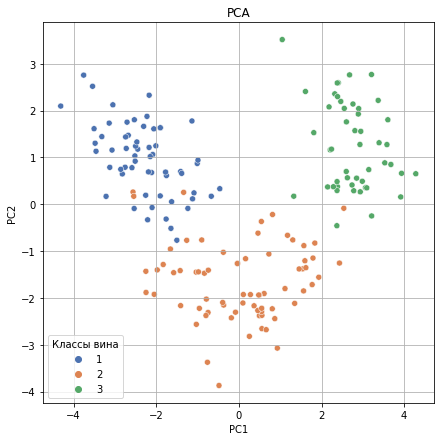

In [30]:
plt.figure(figsize=(7, 7))
labels = (wine_labels + 1).rename("Классы вина")
sns.scatterplot(x=std_wine @ x0, y=std_wine @ x1, hue=labels, palette="deep",
                ).set(xlabel="PC1", ylabel="PC2", title='PCA')
plt.grid()

PCA может быть использовано для отброса коллинеарных характеристик, а также для возможности отобразить многомерные данные в 2-D проекции

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [31]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X > 10).astype(int)

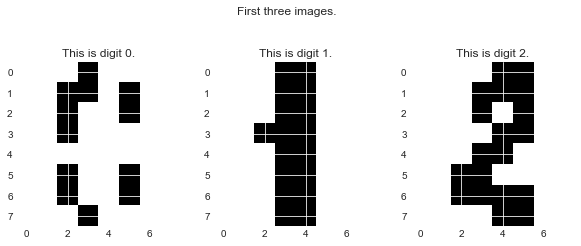

In [32]:
plt.style.use('seaborn-darkgrid')
f, ax = plt.subplots(1, 3, figsize=(10, 4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8, 8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [35]:
clf = RandomForestClassifier(max_depth=13, random_state=1)


def prep_data(x_data):
    data_ = x_data.copy()
    np.random.seed(42)
    x_shadow = data_.apply(np.random.permutation)
    x_shadow.columns = ['shadow_' + feat for feat in data_.columns]
    x_boruta = pd.concat([data_, x_shadow], axis=1)
    return x_boruta


clf.fit(prep_data(X_train), y_train)
acc = accuracy_score(y_val, clf.predict(prep_data(X_val)), normalize=True)

print(acc)

0.9876543209876543


In [36]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [37]:
# ! pip install boruta

In [38]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13),
                         n_estimators='auto',
                         verbose=0,
                         max_iter=100,
                         random_state=42)

feat_selector.fit_transform(X_train.values, y_train)

ModuleNotFoundError: No module named 'boruta'

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

In [ ]:
mask = np.array(feat_selector.support_).reshape(8, 8)
plt.imshow(mask);

**Всё пиксели в белых областях избыточны. Попробуем их не использовать**

At the end let us redo  classification but only with selected features

Все избыточные признаки(features) имеют False результаты в BorutaPy. Оставим только те признаки, которые имеют значение True

In [ ]:
df = pd.DataFrame(feat_selector.support_)
selected_features = df.index[df[0] == True].tolist()

Создадим вспомогательную функцию, которая их X данных делает фрагмент (slice) только с "полезные" признаками.

In [ ]:
def prep_filter_data(x_data):
    return prep_data(x_data.iloc[:, selected_features])

Посмотрим на размерность данных

In [ ]:
X_train.shape, prep_data(X_train).shape, prep_filter_data(X_train).shape, len(selected_features)

Форма X_train имеет 64 признака, после добавления теневых признаков (shadow features) это количество увеличивается вдвое - до 128 признаков. После BorutaPy мы выяснили 31 "полезный" признак и добавили столько же теневых - в результате у нас данных становится 62. Меньше в 2 раза, чем было. Посмотрим, изменилась ли Accuracy.

In [ ]:
clf = RandomForestClassifier(max_depth=13, random_state=1)

clf.fit(prep_filter_data(X_train), y_train)
acc = accuracy_score(y_val, clf.predict(prep_filter_data(X_val)), normalize=True)

print(acc)

Accuracy не уменьшилась, хотя при этом уменьшилось количество входных признаков на **33**, а тестовых данных стало меньше на **12375** (33 x 375).

In [ ]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market